In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

#1. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки. 
data = pd.read_csv('museum_visitors.csv')

In [2]:
#2. Вивести перші 5 рядків датасету. 
print(data.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [3]:
#3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків). 
#Величина таблиці
print("Size of table: ", data.shape)

#Тип стовпців
print("\nTypes of columns:\n", data.dtypes)

#Кількість пропусків
print("\nAmount of gaps in each columm:\n", data.isnull().sum())

Size of table:  (59, 5)

Types of columns:
 Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

Amount of gaps in each columm:
 Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [4]:
#4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 
duplicate = data[data.duplicated()]

print("Amount of duplicates:", len(duplicate))

Amount of duplicates: 0


In [5]:
#5. Про які роки містить інформацію датасет. 
years = data['Date'].str.split('-').str[0].unique()
for year in years:
    print(year)

2014
2015
2016
2017
2018


In [6]:
#6. Змінити назви столбців.
data.columns = ['data', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
print(data.head())

         data  avila_adobe  firehouse_museum  chinese_american_museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   america_tropical_interpretive_center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [7]:
#7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду. 
avarage = round(data.drop(columns=['data']).mean())
print("Avarage amount of people for each museum:\n", avarage)

Avarage amount of people for each museum:
 avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
dtype: float64


In [8]:
#8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 
data_2018 = data[data['data'].str.startswith('2018')]
min_2018 = data_2018.drop(columns=['data']).min()
max_2018 = data_2018.drop(columns=['data']).max()

print("Minimum amount of visitors for each museum in 2018:\n", min_2018)
print("\nMaximum amount of visitors for each museum in 2018:\n", max_2018)

Minimum amount of visitors for each museum in 2018:
 avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64

Maximum amount of visitors for each museum in 2018:
 avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [9]:
#9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року.
museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

data_2015 = data[data['data'].str[:4] == '2015']
monthly = data_2015.groupby(data_2015['data'].str[5:7].astype(int))[museums].sum()

max_month = monthly.idxmax().iloc[0]
min_month = monthly.idxmin().iloc[0]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

max_month_name = month_names[max_month - 1]
min_month_name = month_names[min_month - 1]


print("The month with the highest number of visitors for 2015:", max_month_name)
print("The month with the lowest number of visitors for 2015:", min_month_name)

The month with the highest number of visitors for 2015: July
The month with the lowest number of visitors for 2015: February


In [10]:
#10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року 
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Обчислюємо кількість відвідувачів у літо та зиму
summer_visitors = data_2018['avila_adobe'][data['data'].str.split('-').str[1].astype(int).isin(summer_months)].sum()
winter_visitors = data_2018['avila_adobe'][data['data'].str.split('-').str[1].astype(int).isin(winter_months)].sum()

print(f"The number of visitors to the Avila Adobe museum in the summer months of 2018: {summer_visitors}")
print(f"The number of visitors to the Avila Adobe museum in the winter months of 2018: {winter_visitors}")

The number of visitors to the Avila Adobe museum in the summer months of 2018: 66122
The number of visitors to the Avila Adobe museum in the winter months of 2018: 30983


In [11]:
#11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році 
data_2016 = data[data['data'].str.startswith('2016')]

corr = data_2016.corr()
print(corr)

                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum                                           0.443800  
america_tr

C:\Users\Lawer\AppData\Local\Temp\ipykernel_72272\3164164328.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2016.corr()


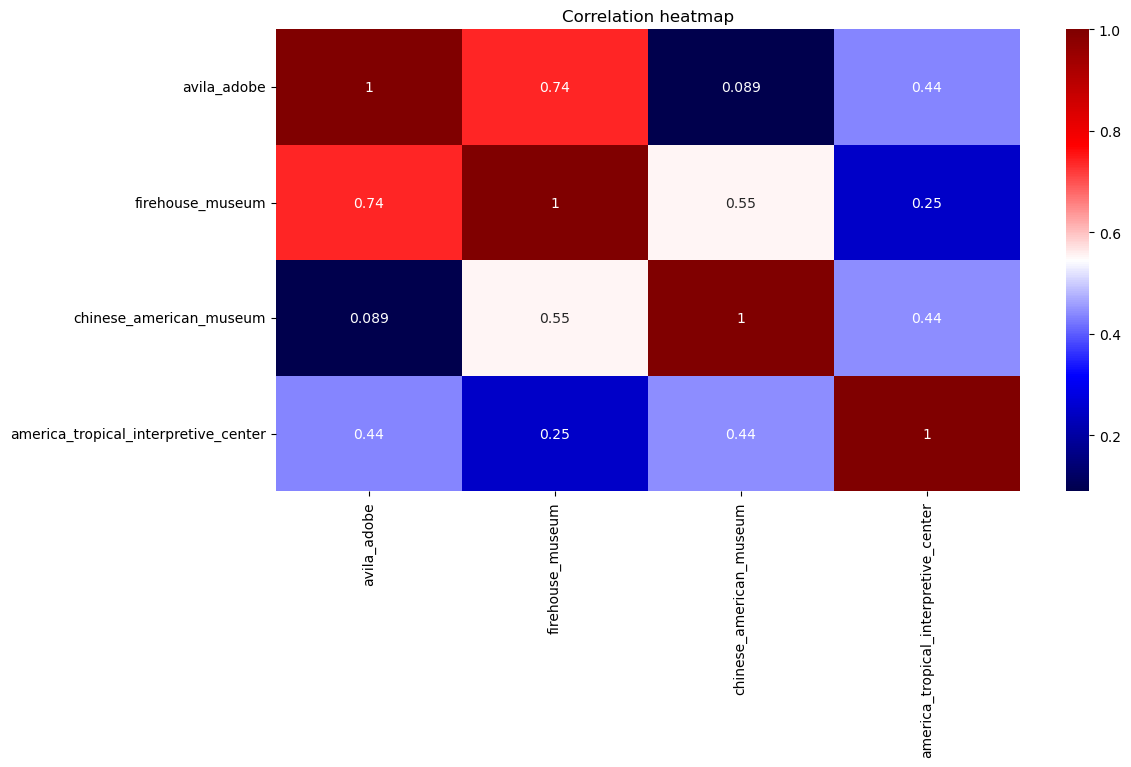

In [12]:
#12. Побудувати теплокарту кореляції для попереднього завдання. 
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title("Correlation heatmap")
plt.show()

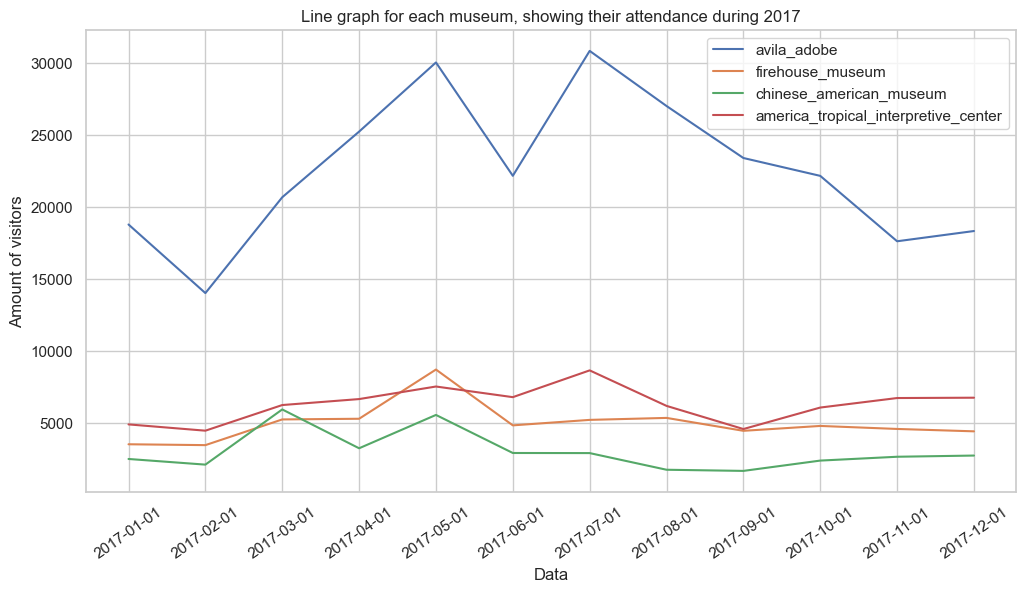

In [13]:
#13. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року. 
data_2017 = data[data['data'].str.startswith('2017')]

sns.set(style="whitegrid")

museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

plt.figure(figsize=(12, 6))
for museum in museums:
    sns.lineplot(data=data_2017, x='data', y=data_2017[museum], label=museum)
    
plt.title("Line graph for each museum, showing their attendance during 2017")
plt.legend(loc='upper right')
plt.xlabel("Data")
plt.ylabel("Amount of visitors")
plt.xticks(rotation=35)
plt.show()

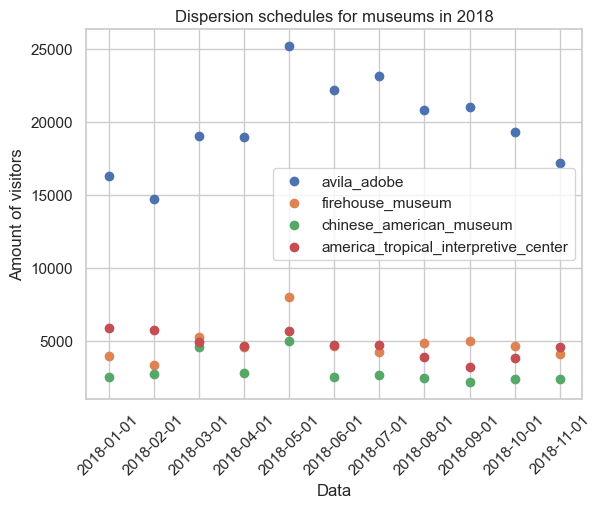

In [14]:
#14. Побудувати графіки розсіювання для кожного музею за 2018 рік.
for museum in museums:
    plt.scatter(data_2018['data'], data_2018[museum], label=museum)

plt.title('Dispersion schedules for museums in 2018')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Amount of visitors')
plt.legend()
plt.show()

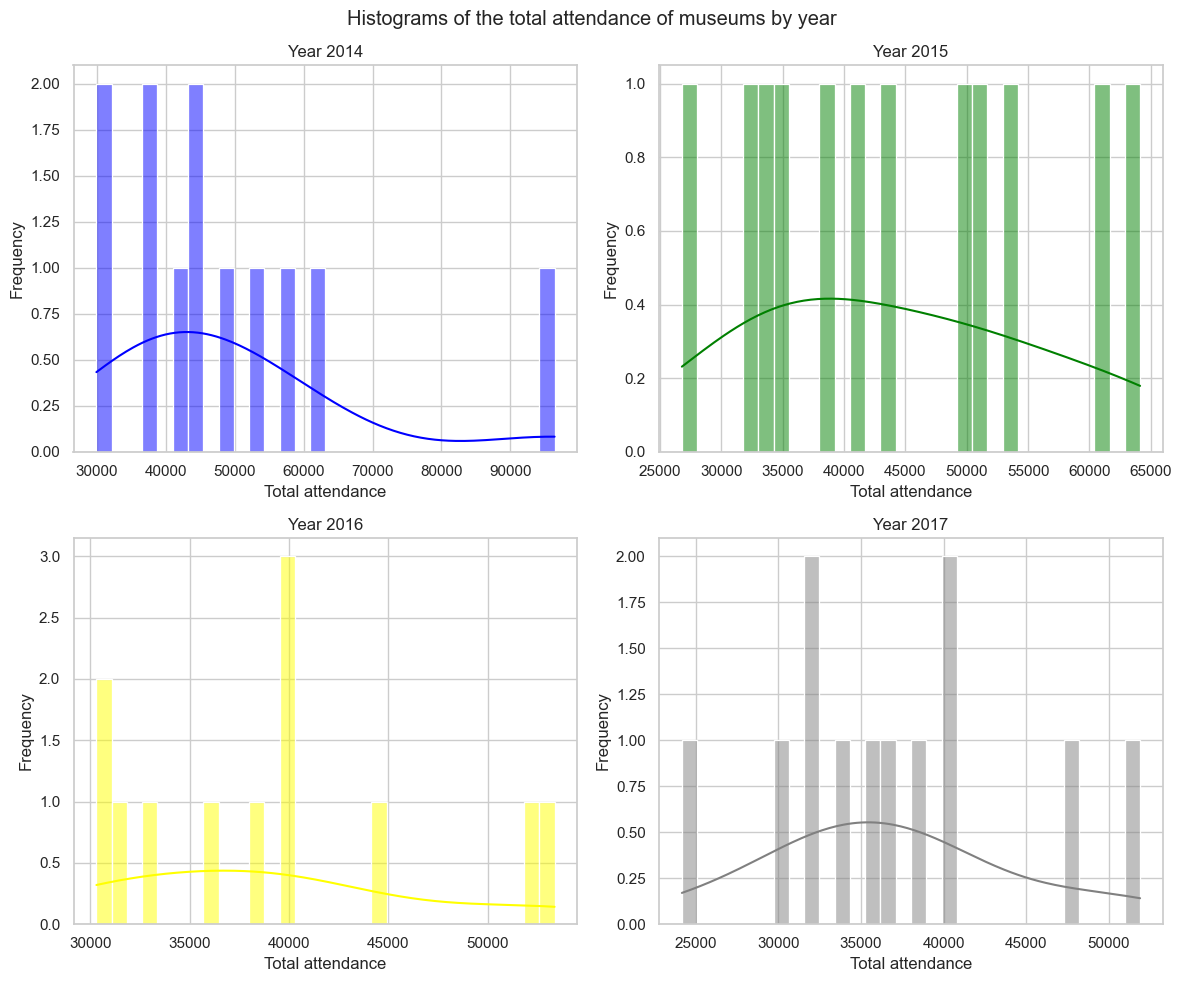

In [19]:
#15. Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. 

sns.set(style= "whitegrid")

data_2014 = data[data['data'].str.startswith('2014')]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Histograms of the total attendance of museums by year")

colors = ['blue', 'green', 'yellow', 'gray']

for i, data_year in enumerate([data_2014, data_2015, data_2016, data_2017]):
    summed_visitors = data_year[museums].sum(axis=1)
    ax = axes[i // 2, i % 2]
    sns.histplot(data=summed_visitors, bins=30, kde=True, ax=ax, color=colors[i])
    ax.set_title(f"Year {i + 2014}")
    ax.set_xlabel("Total attendance")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

На практичній роботі я навчився перевіряти наявність дублікатів у таблиці, знаходити максимальну та мінімальну кількість відвідувачів за певним роком, порівнювати кількість відвідувачів за певними місяцями, знаходити кореляцію за певним роком, будувати теплокарту кореляції, графіки ліній і розсіювання та гістограми.